<a href="https://colab.research.google.com/github/shedhae/CarPrediction_CodeAlpha/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Read the CSV file
df = pd.read_csv('/car data.csv')

In [ ]:
# Step 3: Explore the data
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [ ]:
print("\nStatistical summary:")
print(df.describe())



Statistical summary:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


Text(0.5, 1.0, 'Selling Price Distribution')

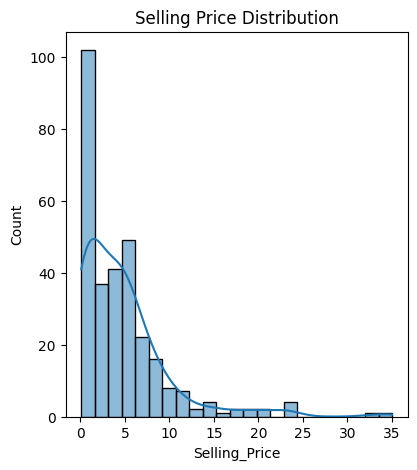

In [ ]:
# Step 4: Data Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Selling Price Distribution')


<ipython-input-13-1521029356>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Present_Price', y='Selling_Price', data=df,


Text(0, 0.5, 'Selling Price')

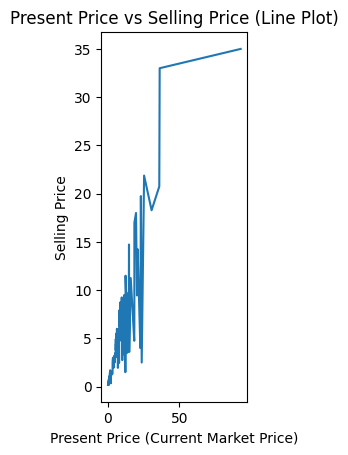

In [ ]:
# First plot: Present Price vs Selling Price (now with lineplot)
plt.subplot(1, 3, 2)
sns.lineplot(x='Present_Price', y='Selling_Price', data=df,
             ci=None, estimator='mean', sort=True)  # ci=None removes confidence interval shading
plt.title('Present Price vs Selling Price (Line Plot)')
plt.xlabel('Present Price (Current Market Price)')
plt.ylabel('Selling Price')


<ipython-input-14-2652173845>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Driven_kms', y='Selling_Price', data=df,


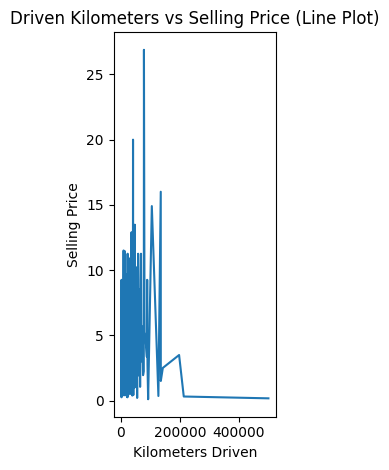

In [ ]:
plt.subplot(1, 3, 3)
sns.lineplot(x='Driven_kms', y='Selling_Price', data=df,
             ci=None, estimator='mean', sort=True)
plt.title('Driven Kilometers vs Selling Price (Line Plot)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Data Preprocessing
# Calculate car age instead of year
df['Car_Age'] = 2025 - df['Year']


In [ ]:
# Drop unnecessary columns

df=df.drop(['Car_Name', 'Year'],axis=1)

In [ ]:
# Convert categorical variables to numerical
df =pd.get_dummies(df,columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [ ]:
# Step 6: Prepare data for modeling y will be removed frome df and isolated alone =< model should predict y
x= df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()


In [ ]:
model.fit(x_train , y_train)

LinearRegression()

In [ ]:
# Step 8: Make predictions
y_pred=model.predict(x_test)

In [ ]:
# Step 9: Evaluate the model
print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")


Model Evaluation:
Mean Absolute Error: 1.22
Mean Squared Error: 3.48
Root Mean Squared Error: 1.87
R-squared Score: 0.85


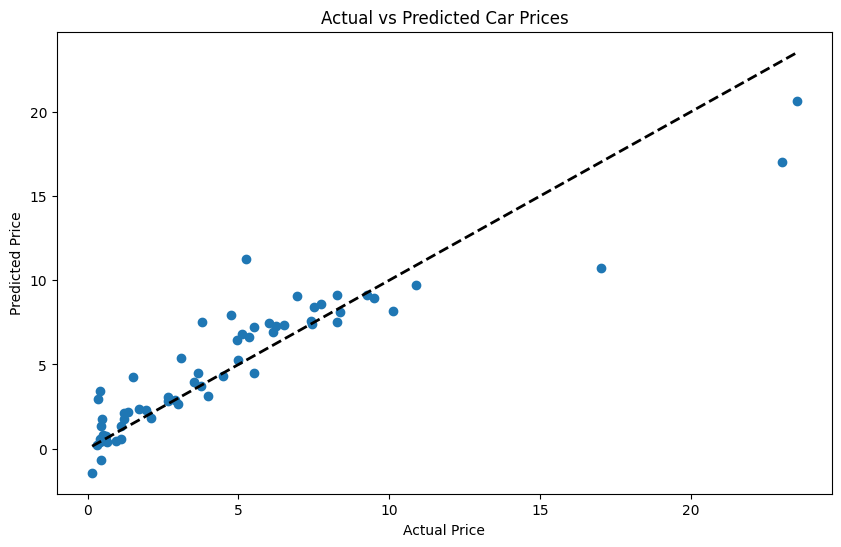

In [ ]:
# Step 10: Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()